# **EDA**

In [1]:
import os
import re
import pandas as pd
from typing import List
from num2words import num2words
from collections import Counter

from utils import tokens_generator
from plotter import plot_bar, plot_hist, plot_token_occurencies

In [2]:
def get_tokens_count(captions: List[str]) -> pd.DataFrame:
    c = Counter()
    for tokens in tokens_generator(texts=captions):
        c.update(tokens)

    tokens_count = pd.DataFrame(
        data={"token": list(c.keys()), "count": list(c.values())}
    ).sort_values(by="count", ascending=False)
    return tokens_count

In [3]:
def remove_redundant_spaces(text: str) -> str:
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text


def preprocess_texts(captions: List[str]) -> List[str]:
    captions = [caption.lower() for caption in captions]
    captions = [
        caption.replace("#", "number").replace("&", "and") for caption in captions
    ]
    # Remove everything that it's in parentheses.
    captions = [re.sub(r"\(.+\)", "", caption) for caption in captions]
    captions = [re.sub(r"[\.\;\!:\(\)]", "", caption) for caption in captions]
    captions = [remove_redundant_spaces(caption) for caption in captions]

    # Numbers to words.
    captions = [
        " ".join(
            [
                num2words(token) if token.isdigit() else token
                for token in caption.split()
            ]
        )
        for caption in captions
    ]

    captions = [
        caption if caption[-1] == "." else caption + " ." for caption in captions
    ]

    return captions

In [4]:
data_path = os.path.join(".", "data")
output_path = os.path.join(data_path, "unique_images_csv")
preprocessed_images_output_path = os.path.join(data_path, "unique_preprocessed_images")
images_path = os.path.join(data_path, "Images")
captions_path = os.path.join(data_path, "captions.txt")

save_eda_results_to = os.path.join(data_path, "eda")
os.makedirs(save_eda_results_to, exist_ok=True)

## **Captions Length**

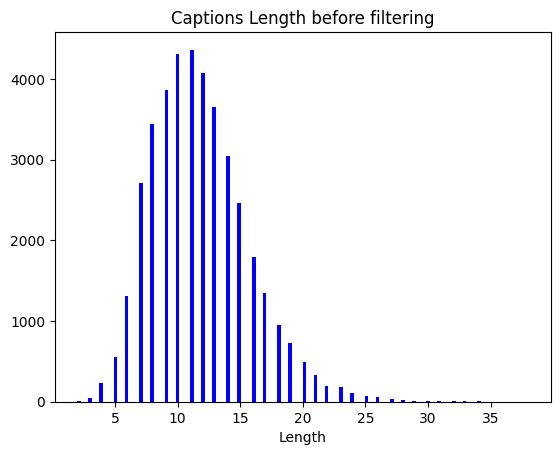

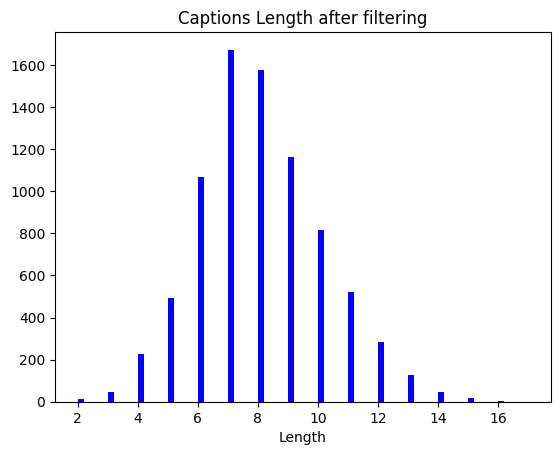

In [5]:
# Read the captions file
df = pd.read_csv(captions_path)

df["lengths"] = [len(caption.split()) for caption in df["caption"].tolist()]

plot_hist(
    data=df["lengths"].tolist(),
    title="Captions Length before filtering",
    xlabel="Length",
    saveto=os.path.join(save_eda_results_to, "captions_length_before_filtering.png"),
)

# For each image keep the smallest, in length, caption.
df = df.loc[df.groupby("image")["lengths"].idxmin()]

plot_hist(
    data=df["lengths"].tolist(),
    title="Captions Length after filtering",
    xlabel="Length",
    saveto=os.path.join(save_eda_results_to, "captions_length_after_filtering.png"),
)

# df["new_caption"] = preprocess_texts(captions=df["caption"].tolist())
# df.to_csv("seethis.csv", index=False)

## **Word Occurencies**

### **Before Pre-processing**

In [6]:
tokens_count = get_tokens_count(captions=df["caption"].tolist())
tokens_count

,token,count
7,.,6571
4,a,5103
0,A,4068
19,in,2210
20,the,1753
...,...,...
2364,asphalt,1
2363,piling,1
2361,mat,1
2360,clibing,1


In [7]:
# Set an upper bound to count, so we can plot the results better.
max_thres = 1000
tokens_count.loc[tokens_count["count"] > max_thres, "count"] = max_thres

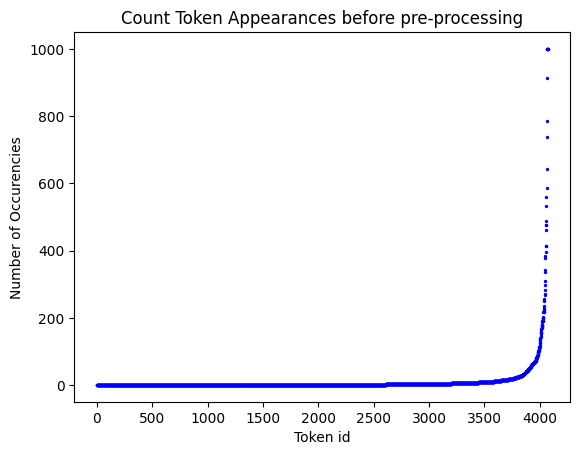

In [8]:
plot_token_occurencies(
    data=tokens_count.sort_values(by="count", ascending=True)["count"].tolist(),
    title="Count Token Appearances before pre-processing",
    saveto=os.path.join(save_eda_results_to, "token_appearances_before_preprocessing.png"),
    xlabel="Token id",
    ylabel="Number of Occurencies"
)

### **After Pre-processing the captions**

In [9]:
df["new_caption"] = preprocess_texts(captions=df["caption"].tolist())
df.head()

,image,caption,lengths,new_caption
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,8,a girl going into a wooden building .
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting,9,a black dog and a spotted dog are fighting .
14,1002674143_1b742ab4b8.jpg,Young girl with pigtails painting outside in t...,10,young girl with pigtails painting outside in t...
19,1003163366_44323f5815.jpg,man laying on bench holding leash of dog sitti...,11,man laying on bench holding leash of dog sitti...
21,1007129816_e794419615.jpg,A man wears an orange hat and glasses .,9,a man wears an orange hat and glasses .


In [10]:
new_tokens_count = get_tokens_count(captions=df["new_caption"].tolist())
new_tokens_count

,token,count
0,a,9171
6,.,8091
18,in,2210
19,the,2137
23,on,1483
...,...,...
2503,yong,1
2502,port-a-potties,1
2501,cleans,1
2500,boards,1


In [11]:
# Set an upper bound to count, so we can plot the results better.
max_thres = 1000
new_tokens_count.loc[new_tokens_count["count"] > max_thres, "count"] = max_thres

In [12]:
new_tokens_count

,token,count
0,a,1000
6,.,1000
18,in,1000
19,the,1000
23,on,1000
...,...,...
2503,yong,1
2502,port-a-potties,1
2501,cleans,1
2500,boards,1


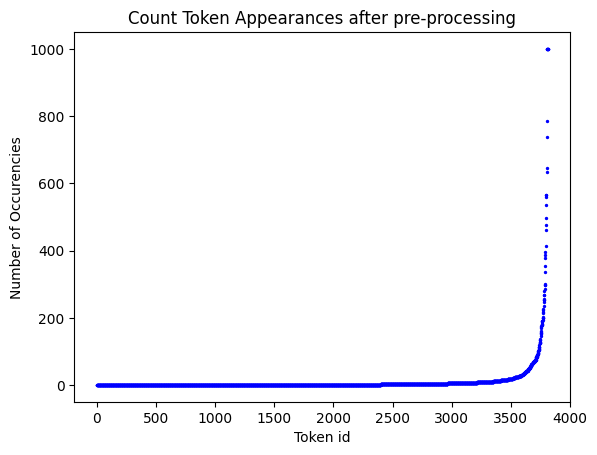

In [13]:
plot_token_occurencies(
    data=new_tokens_count.sort_values(by="count", ascending=True)["count"].tolist(),
    title="Count Token Appearances after pre-processing",
    saveto=os.path.join(save_eda_results_to, "token_appearances_after_preprocessing.png"),
    xlabel="Token id",
    ylabel="Number of Occurencies"
)

## **Most and least frequent tokens**

In [16]:
top_k = 25

### **Before Pre-processing**

In [17]:
tokens_count = get_tokens_count(captions=df["caption"].tolist())
tokens_count

,token,count
7,.,6571
4,a,5103
0,A,4068
19,in,2210
20,the,1753
...,...,...
2364,asphalt,1
2363,piling,1
2361,mat,1
2360,clibing,1


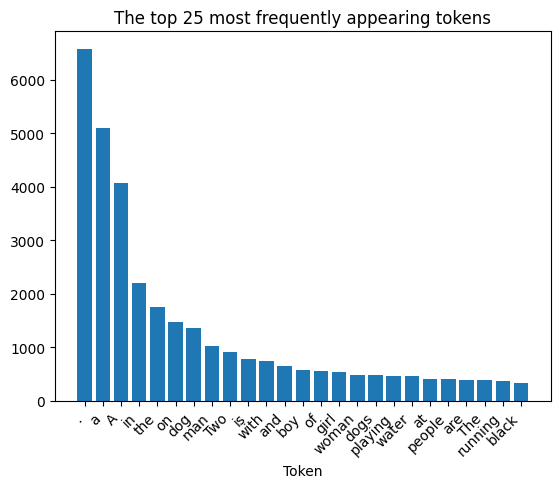

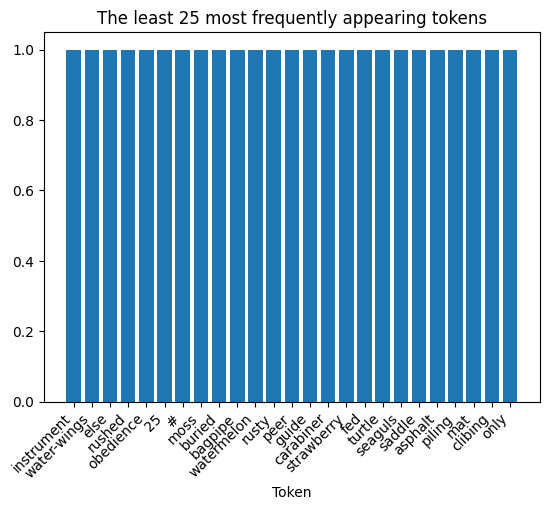

In [18]:
plot_bar(
    data=tokens_count.iloc[:top_k]["count"].tolist(),
    title=f"The top {top_k} most frequently appearing tokens",
    saveto=os.path.join(save_eda_results_to, f"{top_k}_most_freq_tokens_before_preprocessing.png"),
    xticks=tokens_count.iloc[:top_k]["token"].tolist(),
    xlabel="Token"
)

plot_bar(
    data=tokens_count.iloc[-top_k:]["count"].tolist(),
    title=f"The least {top_k} most frequently appearing tokens",
    saveto=os.path.join(save_eda_results_to, f"{top_k}_least_freq_tokens_before_preprocessing.png"),
    xticks=tokens_count.iloc[-top_k:]["token"].tolist(),
    xlabel="Token"
)

### **After Pre-processing the captions**

In [19]:
df["new_caption"] = preprocess_texts(captions=df["caption"].tolist())

In [20]:
new_tokens_count = get_tokens_count(captions=df["new_caption"].tolist())
new_tokens_count

,token,count
0,a,9171
6,.,8091
18,in,2210
19,the,2137
23,on,1483
...,...,...
2503,yong,1
2502,port-a-potties,1
2501,cleans,1
2500,boards,1


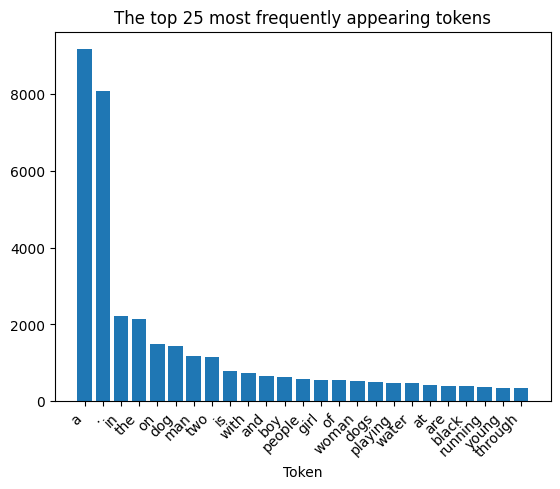

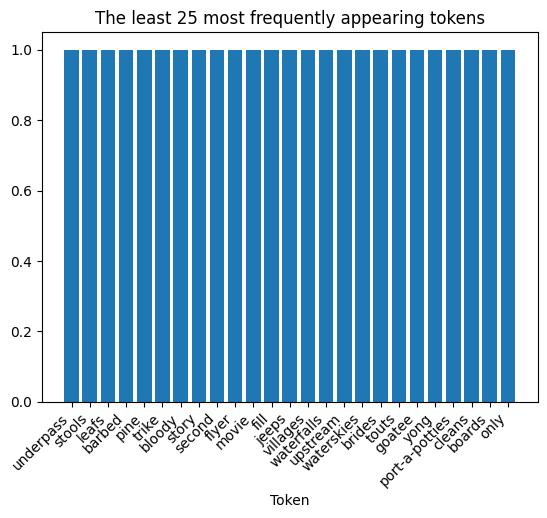

In [21]:
plot_bar(
    data=new_tokens_count.iloc[:top_k]["count"].tolist(),
    title=f"The top {top_k} most frequently appearing tokens",
    saveto=os.path.join(save_eda_results_to, f"{top_k}_most_freq_tokens__after_preprocessing.png"),
    xticks=new_tokens_count.iloc[:top_k]["token"].tolist(),
    xlabel="Token"
)

plot_bar(
    data=new_tokens_count.iloc[-top_k:]["count"].tolist(),
    title=f"The least {top_k} most frequently appearing tokens",
    saveto=os.path.join(save_eda_results_to, f"{top_k}_least_freq_tokens_after_preprocessing.png"),
    xticks=new_tokens_count.iloc[-top_k:]["token"].tolist(),
    xlabel="Token"
)